In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

%matplotlib inline

In [5]:
coronovirus_data = pd.read_csv("data/owid-covid-data.csv")

coronovirus_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [4]:
coronovirus_data_shape = coronovirus_data.shape
coronovirus_data_shape

(79277, 59)

In [4]:
coronovirus_data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

Количество null значений в каждом столбце в процентном соотношении от общего числа строк

In [6]:
coronovirus_data.isnull().sum() / coronovirus_data_shape[0] * 100

iso_code                                  0.000000
continent                                 4.879095
location                                  0.000000
date                                      0.000000
total_cases                               1.990489
new_cases                                 1.993012
new_cases_smoothed                        3.255673
total_deaths                             13.884229
new_deaths                               13.684928
new_deaths_smoothed                       3.255673
total_cases_per_million                   2.522800
new_cases_per_million                     2.525323
new_cases_smoothed_per_million            3.781677
total_deaths_per_million                 14.400141
new_deaths_per_million                   14.200840
new_deaths_smoothed_per_million           3.781677
reproduction_rate                        19.464662
icu_patients                             89.526597
icu_patients_per_million                 89.526597
hosp_patients                  

In [9]:
null_table = coronovirus_data[coronovirus_data.continent.isnull()]
null_table

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
405,OWID_AFR,NaN,Africa,2020-02-13,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
406,OWID_AFR,NaN,Africa,2020-02-14,1.0,1.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407,OWID_AFR,NaN,Africa,2020-02-15,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
408,OWID_AFR,NaN,Africa,2020-02-16,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
409,OWID_AFR,NaN,Africa,2020-02-17,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78151,OWID_WRL,NaN,World,2021-03-30,128212983.0,568122.0,572512.000,2803397.0,11561.0,9872.286,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
78152,OWID_WRL,NaN,World,2021-03-31,128896025.0,683042.0,579538.143,2815659.0,12262.0,10243.286,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
78153,OWID_WRL,NaN,World,2021-04-01,129607651.0,711626.0,588170.000,2827520.0,11861.0,10296.714,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
78154,OWID_WRL,NaN,World,2021-04-02,130236504.0,628853.0,586405.429,2837709.0,10189.0,10011.143,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737


In [14]:
null_table.location.unique()

array(['Africa', 'Asia', 'Europe', 'European Union', 'International',
       'North America', 'Oceania', 'South America', 'World'], dtype=object)

Как мы видим примерно в 5% строк пропущены значения континента, но страна не пропущена нигде.  
Легко восстановить эти значения  
Для этого нам понадобяться таблица из Википедии - принадлежность страны континенту.

In [13]:
website_url = requests.get('https://ru.wikipedia.org/wiki/Список_стран_по_континентам').text

soup = BeautifulSoup(website_url, 'lxml')

In [14]:
h3 = soup.find_all('h3')
h3

[<h3><span id=".D0.90.D1.84.D1.80.D0.B8.D0.BA.D0.B0"></span><span class="mw-headline" id="Африка">Африка</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a class="mw-editsection-visualeditor" href="/w/index.php?title=%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%81%D1%82%D1%80%D0%B0%D0%BD_%D0%BF%D0%BE_%D0%BA%D0%BE%D0%BD%D1%82%D0%B8%D0%BD%D0%B5%D0%BD%D1%82%D0%B0%D0%BC&amp;veaction=edit&amp;section=2" title="Редактировать раздел «Африка»">править</a><span class="mw-editsection-divider"> | </span><a href="/w/index.php?title=%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%81%D1%82%D1%80%D0%B0%D0%BD_%D0%BF%D0%BE_%D0%BA%D0%BE%D0%BD%D1%82%D0%B8%D0%BD%D0%B5%D0%BD%D1%82%D0%B0%D0%BC&amp;action=edit&amp;section=2" title="Редактировать раздел «Африка»">править код</a><span class="mw-editsection-bracket">]</span></span></h3>,
 <h3><span id=".D0.90.D0.B7.D0.B8.D1.8F"></span><span class="mw-headline" id="Азия">Азия</span><span class="mw-editsection"><span class="mw-editsection-bra

Correlation matrix

In [7]:
corr = coronovirus_data.corr()

corr

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
total_cases,1.000000,0.876812,0.889358,0.984827,0.842613,0.870856,0.137786,0.065452,0.078062,0.161733,...,0.018704,-0.033791,-0.034841,0.020765,-0.001082,-0.009486,0.030270,-0.007580,0.021034,0.036663
new_cases,0.876812,1.000000,0.988552,0.895564,0.927634,0.924195,0.109485,0.109532,0.115090,0.134544,...,0.023482,-0.039646,-0.040836,0.021281,0.004435,-0.008400,0.034130,-0.003961,0.026916,0.045042
new_cases_smoothed,0.889358,0.988552,1.000000,0.906790,0.919682,0.940580,0.111953,0.098703,0.117149,0.137702,...,0.023909,-0.040101,-0.041335,0.021600,0.004515,-0.008567,0.034440,-0.004078,0.027220,0.045613
total_deaths,0.984827,0.895564,0.906790,1.000000,0.875750,0.904489,0.122914,0.057504,0.067312,0.177909,...,0.015983,-0.041881,-0.044329,0.026848,-0.002932,-0.009586,0.039996,-0.011423,0.026235,0.041804
new_deaths,0.842613,0.927634,0.919682,0.875750,1.000000,0.971573,0.093248,0.079538,0.085924,0.140453,...,0.016459,-0.046243,-0.045221,0.028874,-0.000241,-0.005598,0.044326,-0.006429,0.028180,0.046407
new_deaths_smoothed,0.870856,0.924195,0.940580,0.904489,0.971573,1.000000,0.105413,0.076688,0.093470,0.146632,...,0.020714,-0.046932,-0.048413,0.021735,0.003290,-0.011029,0.042094,-0.005199,0.030182,0.049073
total_cases_per_million,0.137786,0.109485,0.111953,0.122914,0.093248,0.105413,1.000000,0.592190,0.709082,0.835849,...,0.319636,-0.271776,-0.168308,0.043971,0.313761,0.027507,0.348189,0.146987,0.335209,0.350171
new_cases_per_million,0.065452,0.109532,0.098703,0.057504,0.079538,0.076688,0.592190,1.000000,0.846620,0.496084,...,0.233812,-0.235066,-0.121456,0.017520,0.325962,0.048860,0.282934,0.160119,0.271852,0.302526
new_cases_smoothed_per_million,0.078062,0.115090,0.117149,0.067312,0.085924,0.093470,0.709082,0.846620,1.000000,0.578255,...,0.266239,-0.263593,-0.138351,0.020190,0.368157,0.054410,0.324851,0.180697,0.320804,0.343458
total_deaths_per_million,0.161733,0.134544,0.137702,0.177909,0.140453,0.146632,0.835849,0.496084,0.578255,1.000000,...,0.232650,-0.300031,-0.205282,-0.030462,0.384310,-0.004818,0.318019,0.145046,0.357690,0.365032


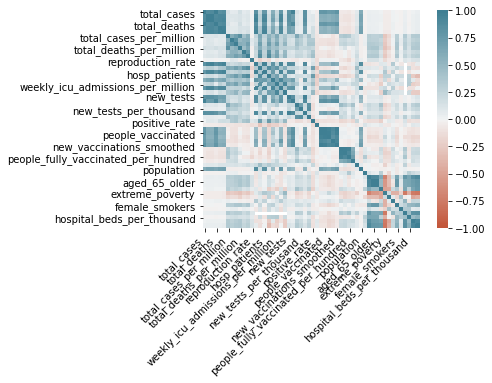

In [14]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.figure.savefig("output.png", dpi=400)

In [17]:
twitter_data = pd.read_csv("data/Corona_NLP_train.csv", encoding = "ISO-8859-1")
twitter_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [18]:
twitter_data.TweetAt.max()

'31-03-2020'

In [20]:
twitter_data.shape

(41157, 6)